In [0]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from keras.models import Model
from keras.layers import Input, Dense, Activation, BatchNormalization, Dropout
from keras.optimizers import Adam
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
from google.colab import files
uploaded = files.upload()

Saving email.csv to email (1).csv


In [86]:
df=pd.read_csv('https://raw.githubusercontent.com/AttilaDSA/IntilaqDSAcademy/master/Deep%20Learning%20Labs/Lab%20Logistic%20Regression/email.csv', index_col=0)
df.head()

,spam,to_multiple,from,cc,sent_email,image,attach,dollar,winner,inherit,password,num_char,line_breaks,format,re_subj,exclaim_subj,urgent_subj,exclaim_mess,number
1,0,no,yes,no,no,no,no,no,no,no,no,11.370,202,HTML,no,no,no,0,big
2,0,no,yes,no,no,no,no,no,no,no,no,10.504,202,HTML,no,no,no,1,small
3,0,no,yes,no,no,no,no,yes,no,yes,no,7.773,192,HTML,no,no,no,6,small
4,0,no,yes,no,no,no,no,no,no,no,no,13.256,255,HTML,no,no,no,48,small
5,0,no,yes,no,no,no,no,no,no,no,yes,1.231,29,Plain,no,no,no,1,none


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3921 entries, 1 to 3921
Data columns (total 19 columns):
spam            3921 non-null int64
to_multiple     3921 non-null object
from            3921 non-null object
cc              3921 non-null object
sent_email      3921 non-null object
image           3921 non-null object
attach          3921 non-null object
dollar          3921 non-null object
winner          3921 non-null object
inherit         3921 non-null object
password        3921 non-null object
num_char        3921 non-null float64
line_breaks     3921 non-null int64
format          3921 non-null object
re_subj         3921 non-null object
exclaim_subj    3921 non-null object
urgent_subj     3921 non-null object
exclaim_mess    3921 non-null int64
number          3921 non-null object
dtypes: float64(1), int64(3), object(15)
memory usage: 612.7+ KB


In [88]:
col_object=[col for col in df.columns if df.dtypes[col]=='object']
for col in col_object:
  print("********",col)
  print(df[col].unique())

******** to_multiple
['no' 'yes']
******** from
['yes' 'no']
******** cc
['no' 'yes']
******** sent_email
['no' 'yes']
******** image
['no' 'yes']
******** attach
['no' 'yes']
******** dollar
['no' 'yes']
******** winner
['no' 'yes']
******** inherit
['no' 'yes']
******** password
['no' 'yes']
******** format
['HTML' 'Plain']
******** re_subj
['no' 'yes']
******** exclaim_subj
['no' 'yes']
******** urgent_subj
['no' 'yes']
******** number
['big' 'small' 'none']


In [0]:
number=LabelEncoder()
for col in col_object:
  df[col]=number.fit_transform(df[col])

In [90]:
df.head()

,spam,to_multiple,from,cc,sent_email,image,attach,dollar,winner,inherit,password,num_char,line_breaks,format,re_subj,exclaim_subj,urgent_subj,exclaim_mess,number
1,0,0,1,0,0,0,0,0,0,0,0,11.370,202,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0,10.504,202,0,0,0,0,1,2
3,0,0,1,0,0,0,0,1,0,1,0,7.773,192,0,0,0,0,6,2
4,0,0,1,0,0,0,0,0,0,0,0,13.256,255,0,0,0,0,48,2
5,0,0,1,0,0,0,0,0,0,0,1,1.231,29,1,0,0,0,1,1


In [0]:
data=df.drop('spam', axis=1)
target=df['spam']

In [0]:
scaler=MinMaxScaler()
data=scaler.fit_transform(data)

In [0]:
X_train, X_test, y_train, y_test=train_test_split(data, target, test_size=0.25, random_state=26)

In [0]:
def model(input_shape):
  x_input=Input(input_shape)
  x=Dense(10, activation='tanh')(x_input)
  x=BatchNormalization()(x)
  x=Dense(10, activation='tanh')(x_input)
  x=BatchNormalization()(x)
  x=Dense(1)(x)
  x=Activation('sigmoid')(x)
  model=Model(inputs=x_input, outputs=x)
  return model

In [134]:
data.shape, y_train.shape

((3921, 18), (2940,))

In [0]:
spamModel=model((data.shape[1],))

In [0]:
optimizer=Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=10**-9, decay=0.0, amsgrad=False)

In [0]:
spamModel.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [171]:
history=spamModel.fit(x=X_train, y=y_train, epochs=100, validation_data=(X_test,y_test))

Train on 2940 samples, validate on 981 samples
Epoch 1/100
2940/2940 [==============================] - 0s 72us/step - loss: 0.2226 - acc: 0.9112 - val_loss: 0.2444 - val_acc: 0.9021
Epoch 2/100
2940/2940 [==============================] - 0s 69us/step - loss: 0.2208 - acc: 0.9143 - val_loss: 0.2443 - val_acc: 0.9021
Epoch 3/100
2940/2940 [==============================] - 0s 69us/step - loss: 0.2203 - acc: 0.9133 - val_loss: 0.2443 - val_acc: 0.9021
Epoch 4/100
2940/2940 [==============================] - 0s 69us/step - loss: 0.2188 - acc: 0.9133 - val_loss: 0.2442 - val_acc: 0.9021
Epoch 5/100
2940/2940 [==============================] - 0s 71us/step - loss: 0.2190 - acc: 0.9163 - val_loss: 0.2442 - val_acc: 0.9021
Epoch 6/100
2940/2940 [==============================] - 0s 68us/step - loss: 0.2180 - acc: 0.9146 - val_loss: 0.2441 - val_acc: 0.9021
Epoch 7/100
2940/2940 [==============================] - 0s 70us/step - loss: 0.2210 - acc: 0.9150 - val_loss: 0.2441 - val_acc: 0.9021
E

In [172]:
loss, acc=spamModel.evaluate(X_test, y_test)
print("loss= "+str(loss))
print("test accuracy= "+str(acc))

981/981 [==============================] - 0s 39us/step
loss= 0.24201109437281446
test accuracy= 0.903160041078515


In [173]:
spamModel.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, 18)                0         
_________________________________________________________________
dense_20 (Dense)             (None, 10)                190       
_________________________________________________________________
batch_normalization_14 (Batc (None, 10)                40        
_________________________________________________________________
dense_21 (Dense)             (None, 1)                 11        
_________________________________________________________________
activation_7 (Activation)    (None, 1)                 0         
Total params: 241
Trainable params: 221
Non-trainable params: 20
_________________________________________________________________


In [0]:
predictions=np.zeros(X_test.shape[0])
predictions[(spamModel.predict(X_test)).reshape(X_test.shape[0])>0.5]=1

In [175]:
print(classification_report(y_true=y_test.values, y_pred=predictions))

             precision    recall  f1-score   support

          0       0.91      0.99      0.95       884
          1       0.54      0.13      0.21        97

avg / total       0.88      0.90      0.88       981



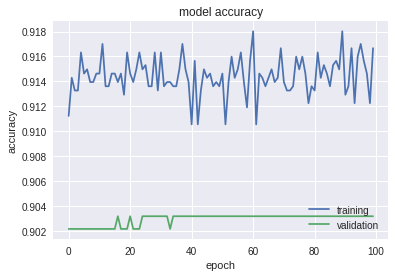

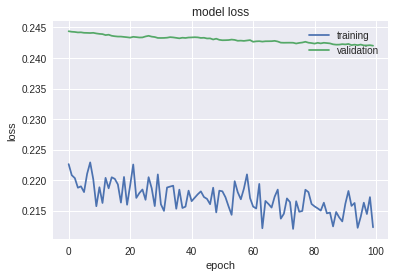

In [176]:
def plot_accuracy(history):
    plt.plot(history.history[ 'acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['training', 'validation'], loc='lower right')
    plt.show()

def plot_loss(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['training', 'validation'], loc='upper right')
    plt.show()
# summarize accuracy
plot_accuracy(history)

# summarize loss
plot_loss(history)